# <font color='red'>Análise de Dados de Ocorrências Criminais - 2015 a 2018</font>
### Fonte crimes: http://dados.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica
### Fonte regiões brasileiras: http://blog.mds.gov.br/redesuas/lista-de-municipios-brasileiros/

In [1]:
# Importando as bibliotecas do Python

import pandas as pd
from pandasql import sqldf
from sqlalchemy import create_engine
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import style
import cufflinks as cf
import plotly.graph_objects as go
import plotly.offline as py
from plotly.offline import iplot
#import plotly.graph_objs as go
import seaborn as sns 
from datetime import datetime
from itertools import product
from sortedcontainers import SortedDict
import os
import glob
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
cf.go_offline()
#plotly.offline.init_notebook_mode(connected=True)

In [2]:
# Visualizando os arquivos

folder_name = 'C:\\PROJETOS_GIT_DEV\\Ocorrencias_Criminais\\Arquivos'
file_type = 'xlsx'
for f in glob.glob(folder_name + "/*." + file_type):
    print(f)

C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\ac---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\al---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\am---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\ap---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\ba---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\ce---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\df---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\es---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\go---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\ma---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\mg---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\ms---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorrencias_Criminais\Arquivos\mt---dadospublicos.xlsx
C:\PROJETOS_GIT_DEV\Ocorr

In [3]:
# Lendo os arquivos. Convertendo os datasets em 2 dataframes com o pacote Pandas

In [4]:
# Lendo a primeira aba das planilhas - Ocorrências
df1 = pd.concat([pd.read_excel(f, sheet_name=0, header=0) for f in glob.glob(folder_name + "/*." + file_type)],ignore_index=True)

In [5]:
# Lendo a segunda aba das planilhas - Vítimas
df2 = pd.concat([pd.read_excel(f, sheet_name=1, header=0) for f in glob.glob(folder_name + "/*." + file_type)],ignore_index=True)

In [6]:
# Visualizando os dados de ocorrências
#print(df1.keys())
df1.head()

,Mês/Ano,Qtde Ocorrências - Polícia Civil - Sinesp Análise (Integração BO),Qtde Ocorrências - Polícia Civil - Sinesp JC,Tipo Crime,UF,Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública
0,01/2015,-,6,Estupro,Acre,6
1,01/2015,-,0,Furto de veículo,Acre,0
2,01/2015,-,13,Homicídio doloso,Acre,13
3,01/2015,-,0,Lesão corporal seguida de morte,Acre,0
4,01/2015,-,0,Roubo a instituição financeira,Acre,0


In [7]:
# Visualizando os dados de vítimas
#print(df2.keys())
df2.head()

,Mês/Ano,Qtde Vítimas (Contexto Sexo/FaixaEtária) - Polícia Civil - Sinesp JC,Qtde Vítimas - Polícia Civil - Sinesp Análise (Integração BO),Sexo da Vítima,Tipo Crime,UF,Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública
0,01/2015,2,-,Feminino,Homicídio doloso,Acre,2
1,01/2015,11,-,Masculino,Homicídio doloso,Acre,11
2,01/2015,-,-,Sexo NI,Homicídio doloso,Acre,-
3,02/2015,1,-,Feminino,Homicídio doloso,Acre,1
4,02/2015,9,-,Masculino,Homicídio doloso,Acre,9


# <font color='blue'>Análise Exploratória de Dados</font>

### Tratando os dados dos dois dataframes (Ocorrências e Vítimas)

In [8]:
# Quantidade de linhas de ocorrências e vítimas
print('Quantidade de registros em Ocorrências:', len(df1.index))
print('Quantidade de registros em Vítimas:', len(df2.index))
#df1.describe()

Quantidade de registros em Ocorrências: 13630
Quantidade de registros em Vítimas: 13426


In [9]:
# Verificando tipo dos atributos em df1
df1.dtypes

Mês/Ano                                                                                  object
Qtde Ocorrências - Polícia Civil - Sinesp Análise (Integração BO)                        object
Qtde Ocorrências - Polícia Civil - Sinesp JC                                             object
Tipo Crime                                                                               object
UF                                                                                       object
Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública    object
dtype: object

In [10]:
# Verificando tipo dos atributos em df2
df2.dtypes

Mês/Ano                                                                                  object
Qtde Vítimas (Contexto Sexo/FaixaEtária) - Polícia Civil - Sinesp JC                     object
Qtde Vítimas - Polícia Civil - Sinesp Análise (Integração BO)                            object
Sexo da Vítima                                                                           object
Tipo Crime                                                                               object
UF                                                                                       object
Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública    object
dtype: object

In [11]:
# Verificando a quantidade de valores nulos nas colunas em df1
df1.isnull().sum()

Mês/Ano                                                                                     0
Qtde Ocorrências - Polícia Civil - Sinesp Análise (Integração BO)                        1695
Qtde Ocorrências - Polícia Civil - Sinesp JC                                             1451
Tipo Crime                                                                                  0
UF                                                                                          0
Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública     206
dtype: int64

In [12]:
# Verificando a quantidade de valores nulos nas colunas em df2
df2.isnull().sum()

Mês/Ano                                                                                     0
Qtde Vítimas (Contexto Sexo/FaixaEtária) - Polícia Civil - Sinesp JC                     1753
Qtde Vítimas - Polícia Civil - Sinesp Análise (Integração BO)                            2539
Sexo da Vítima                                                                              0
Tipo Crime                                                                                  0
UF                                                                                          0
Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública     168
dtype: int64

In [13]:
# Selecionando as colunas relevantes em df1
df1 = pd.DataFrame(df1,columns=['UF','Tipo Crime','Mês/Ano','Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública'])

In [14]:
df1.head()

,UF,Tipo Crime,Mês/Ano,Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública
0,Acre,Estupro,01/2015,6
1,Acre,Furto de veículo,01/2015,0
2,Acre,Homicídio doloso,01/2015,13
3,Acre,Lesão corporal seguida de morte,01/2015,0
4,Acre,Roubo a instituição financeira,01/2015,0


In [15]:
# Selecionando as colunas relevantes em df2
df2 = pd.DataFrame(df2,columns=['UF','Tipo Crime','Mês/Ano','Sexo da Vítima','Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública'])

In [16]:
df2.head()

,UF,Tipo Crime,Mês/Ano,Sexo da Vítima,Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública
0,Acre,Homicídio doloso,01/2015,Feminino,2
1,Acre,Homicídio doloso,01/2015,Masculino,11
2,Acre,Homicídio doloso,01/2015,Sexo NI,-
3,Acre,Homicídio doloso,02/2015,Feminino,1
4,Acre,Homicídio doloso,02/2015,Masculino,9


In [17]:
# Dividindo a coluna "Mês/Ano" para separar mês e ano em df1
df1[['mes','ano']] = df1['Mês/Ano'].apply(lambda x: x[0:]).str.split('/', n=1, expand=True)

In [18]:
# Dividindo a coluna "Mês/Ano" para separar mês e ano em df2
df2[['mes','ano']] = df2['Mês/Ano'].apply(lambda x: x[0:]).str.split('/', n=1, expand=True)

In [19]:
df1.head()

,UF,Tipo Crime,Mês/Ano,Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública,mes,ano
0,Acre,Estupro,01/2015,6,01,2015
1,Acre,Furto de veículo,01/2015,0,01,2015
2,Acre,Homicídio doloso,01/2015,13,01,2015
3,Acre,Lesão corporal seguida de morte,01/2015,0,01,2015
4,Acre,Roubo a instituição financeira,01/2015,0,01,2015


In [20]:
df2.head()

,UF,Tipo Crime,Mês/Ano,Sexo da Vítima,Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública,mes,ano
0,Acre,Homicídio doloso,01/2015,Feminino,2,01,2015
1,Acre,Homicídio doloso,01/2015,Masculino,11,01,2015
2,Acre,Homicídio doloso,01/2015,Sexo NI,-,01,2015
3,Acre,Homicídio doloso,02/2015,Feminino,1,02,2015
4,Acre,Homicídio doloso,02/2015,Masculino,9,02,2015


In [21]:
# Excluindo a coluna "Mês/Ano" em df1
df1.drop('Mês/Ano', axis=1, inplace=True)

In [22]:
# Excluindo a coluna "Mês/Ano" em df2
df2.drop('Mês/Ano', axis=1, inplace=True)

In [23]:
# Renomeando colunas em df1
df1 = df1.rename(columns={'UF': 'estado', 'Tipo Crime': 'tipo_crime', 'Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública': 'valor_considerado'}) 

In [24]:
# Renomeando colunas em df2
df2 = df2.rename(columns={'UF': 'estado', 'Tipo Crime': 'tipo_crime', 'Sexo da Vítima': 'sexo_vitima', 'Valor considerado para Públicação no Portal Ministério da Justiça e Segurança Pública': 'valor_considerado'}) 

In [25]:
df1.head()

,estado,tipo_crime,valor_considerado,mes,ano
0,Acre,Estupro,6,01,2015
1,Acre,Furto de veículo,0,01,2015
2,Acre,Homicídio doloso,13,01,2015
3,Acre,Lesão corporal seguida de morte,0,01,2015
4,Acre,Roubo a instituição financeira,0,01,2015


In [26]:
df2.head()

,estado,tipo_crime,sexo_vitima,valor_considerado,mes,ano
0,Acre,Homicídio doloso,Feminino,2,01,2015
1,Acre,Homicídio doloso,Masculino,11,01,2015
2,Acre,Homicídio doloso,Sexo NI,-,01,2015
3,Acre,Homicídio doloso,Feminino,1,02,2015
4,Acre,Homicídio doloso,Masculino,9,02,2015


In [27]:
# Lendo arquivo de regiões do Brasil. Convertendo o dataset em um dataframe do Pandas.
df_regioes = pd.read_excel('Lista-de-Municípios-com-IBGE-Brasil.xlsx', 'Lista de Estados IBGE')

In [28]:
df_regioes.head()

,IBGE,Estado,UF,Região,Qtd Mun,Sintaxe,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,11,Rondônia,RO,Região Norte,52,11'RO',NaN,NaN,PROCV(A2;'Lista de Estados IBGE'!$A$2:$C$28;2;0)
1,12,Acre,AC,Região Norte,22,12'AC',NaN,NaN,NaN
2,13,Amazonas,AM,Região Norte,62,13'AM',NaN,NaN,NaN
3,14,Roraima,RR,Região Norte,15,14'RR',NaN,NaN,NaN
4,15,Pará,PA,Região Norte,144,15'PA',NaN,NaN,NaN


In [29]:
# Obtendo as colunas de interesse
df_regioes = pd.DataFrame(df_regioes,columns=['Estado','UF','Região'])

In [30]:
df_regioes.head(30)

,Estado,UF,Região
0,Rondônia,RO,Região Norte
1,Acre,AC,Região Norte
2,Amazonas,AM,Região Norte
3,Roraima,RR,Região Norte
4,Pará,PA,Região Norte
5,Amapá,AP,Região Norte
6,Tocantins,TO,Região Norte
7,Maranhão,MA,Região Nordeste
8,Piauí,PI,Região Nordeste
9,Ceará,CE,Região Nordeste


In [31]:
#df_regioes['Região']=df_regioes['Região'].replace('Região','')

In [32]:
#############  FUNÇÃO DE LIMPEZA - REPLACE ACIMA NÃO FUNCIONOU  #####################

def limpar_coluna(coluna):
    coluna = coluna.replace('Região','').replace(' ','')
    return coluna

In [33]:
# Limpando a coluna "Região"
df_regioes['Região'] = df_regioes['Região'].apply(limpar_coluna)

In [34]:
df_regioes.head(30)

,Estado,UF,Região
0,Rondônia,RO,Norte
1,Acre,AC,Norte
2,Amazonas,AM,Norte
3,Roraima,RR,Norte
4,Pará,PA,Norte
5,Amapá,AP,Norte
6,Tocantins,TO,Norte
7,Maranhão,MA,Nordeste
8,Piauí,PI,Nordeste
9,Ceará,CE,Nordeste


In [35]:
# Verificando se os nomes dos estados estão iguais entre df1 e df_regioes
qw1 = pd.unique(df1[['estado']].values.ravel())
print(qw1)

['Acre' 'Alagoas' 'Amazonas' 'Amapá' 'Bahia' 'Ceará' 'Distrito Federal'
 'Espírito Santo' 'Goiás' 'Maranhão' 'Minas Gerais' 'Mato Grosso do Sul'
 'Mato Grosso' 'Pará' 'Paraíba' 'Pernambuco' 'Piauí' 'Paraná'
 'Rio de Janeiro' 'Rio Grande do Norte' 'Rondônia' 'Roraima'
 'Rio Grande do Sul' 'Santa Catarina' 'Sergipe' 'São Paulo' 'Tocantins']


In [36]:
# Verificando se os nomes dos estados estão iguais entre df2 e df_regioes
qw2 = pd.unique(df2[['estado']].values.ravel())
print(qw2)

['Acre' 'Alagoas' 'Amazonas' 'Amapá' 'Bahia' 'Ceará' 'Distrito Federal'
 'Espírito Santo' 'Goiás' 'Maranhão' 'Minas Gerais' 'Mato Grosso do Sul'
 'Mato Grosso' 'Pará' 'Paraíba' 'Pernambuco' 'Piauí' 'Paraná'
 'Rio de Janeiro' 'Rio Grande do Norte' 'Rondônia' 'Roraima'
 'Rio Grande do Sul' 'Santa Catarina' 'Sergipe' 'São Paulo' 'Tocantins']


In [37]:
df_regioes['Estado'].sort_values()

1                    Acre
13                Alagoas
5                   Amapá
2                Amazonas
15                  Bahia
9                   Ceará
26       Distrito Federal
17         Espírito Santo
25                  Goiás
7                Maranhão
24            Mato Grosso
23     Mato Grosso do Sul
16           Minas Gerais
20                 Paraná
11                Paraíba
4                    Pará
12             Pernambuco
8                   Piauí
10    Rio Grande do Norte
22      Rio Grande do Sul
18         Rio de Janeiro
0                Rondônia
3                 Roraima
21         Santa Catarina
14                Sergipe
19              São Paulo
6               Tocantins
Name: Estado, dtype: object

In [38]:
# Renomeando colunas
df_regioes = df_regioes.rename(columns={'Estado': 'estado', 'UF': 'sigla_estado', 'Região': 'regiao'})

In [39]:
df_regioes.head()

,estado,sigla_estado,regiao
0,Rondônia,RO,Norte
1,Acre,AC,Norte
2,Amazonas,AM,Norte
3,Roraima,RR,Norte
4,Pará,PA,Norte


In [40]:
# Fazendo merge entre df1 e df_regioes e criando um novo dataframe de Ocorrências com as regiões
df_ocorr = pd.merge(df1[['estado','tipo_crime','valor_considerado','mes','ano']],df_regioes[['estado','sigla_estado','regiao']],on='estado', how='outer')

In [41]:
df_ocorr.head()

,estado,tipo_crime,valor_considerado,mes,ano,sigla_estado,regiao
0,Acre,Estupro,6,01,2015,AC,Norte
1,Acre,Furto de veículo,0,01,2015,AC,Norte
2,Acre,Homicídio doloso,13,01,2015,AC,Norte
3,Acre,Lesão corporal seguida de morte,0,01,2015,AC,Norte
4,Acre,Roubo a instituição financeira,0,01,2015,AC,Norte


In [42]:
# Fazendo merge entre df2 e df_regioes e criando um novo dataframe de Vítimas com as regiões
df_vit = pd.merge(df2[['estado','tipo_crime','sexo_vitima','valor_considerado','mes','ano']],df_regioes[['estado','sigla_estado','regiao']],on='estado', how='outer')

In [43]:
df_vit.head()

,estado,tipo_crime,sexo_vitima,valor_considerado,mes,ano,sigla_estado,regiao
0,Acre,Homicídio doloso,Feminino,2,01,2015,AC,Norte
1,Acre,Homicídio doloso,Masculino,11,01,2015,AC,Norte
2,Acre,Homicídio doloso,Sexo NI,-,01,2015,AC,Norte
3,Acre,Homicídio doloso,Feminino,1,02,2015,AC,Norte
4,Acre,Homicídio doloso,Masculino,9,02,2015,AC,Norte


In [44]:
# Reordenando as colunas de df_ocorr
df_ocorr = df_ocorr[['regiao','estado','sigla_estado','tipo_crime','mes','ano','valor_considerado']]
df_ocorr.head()

,regiao,estado,sigla_estado,tipo_crime,mes,ano,valor_considerado
0,Norte,Acre,AC,Estupro,01,2015,6
1,Norte,Acre,AC,Furto de veículo,01,2015,0
2,Norte,Acre,AC,Homicídio doloso,01,2015,13
3,Norte,Acre,AC,Lesão corporal seguida de morte,01,2015,0
4,Norte,Acre,AC,Roubo a instituição financeira,01,2015,0


In [45]:
# Reordenando as colunas de df_vit
df_vit = df_vit[['regiao','estado','sigla_estado','tipo_crime','mes','ano','sexo_vitima','valor_considerado']]
df_vit.head()

,regiao,estado,sigla_estado,tipo_crime,mes,ano,sexo_vitima,valor_considerado
0,Norte,Acre,AC,Homicídio doloso,01,2015,Feminino,2
1,Norte,Acre,AC,Homicídio doloso,01,2015,Masculino,11
2,Norte,Acre,AC,Homicídio doloso,01,2015,Sexo NI,-
3,Norte,Acre,AC,Homicídio doloso,02,2015,Feminino,1
4,Norte,Acre,AC,Homicídio doloso,02,2015,Masculino,9


In [46]:
# Checando a quantidade de linhas
print('Quantidade de registros:', len(df_ocorr.index))
print('Quantidade de registros:', len(df_vit.index))

Quantidade de registros: 13630
Quantidade de registros: 13426


In [47]:
# Criando a coluna ID do mês, para que os meses apareçam na ordem correta nos gráficos
df_ocorr['id_mes'] = df_ocorr['mes']
df_vit['id_mes'] = df_vit['mes']

In [48]:
# Convertendo a coluna "id_mes" para tipo inteiro
df_ocorr['id_mes'] = df_ocorr['id_mes'].apply(lambda x: int(x or 0))
df_vit['id_mes'] = df_vit['id_mes'].apply(lambda x: int(x or 0))

In [49]:
df_ocorr.head()

,regiao,estado,sigla_estado,tipo_crime,mes,ano,valor_considerado,id_mes
0,Norte,Acre,AC,Estupro,01,2015,6,1
1,Norte,Acre,AC,Furto de veículo,01,2015,0,1
2,Norte,Acre,AC,Homicídio doloso,01,2015,13,1
3,Norte,Acre,AC,Lesão corporal seguida de morte,01,2015,0,1
4,Norte,Acre,AC,Roubo a instituição financeira,01,2015,0,1


In [50]:
df_vit.head()

,regiao,estado,sigla_estado,tipo_crime,mes,ano,sexo_vitima,valor_considerado,id_mes
0,Norte,Acre,AC,Homicídio doloso,01,2015,Feminino,2,1
1,Norte,Acre,AC,Homicídio doloso,01,2015,Masculino,11,1
2,Norte,Acre,AC,Homicídio doloso,01,2015,Sexo NI,-,1
3,Norte,Acre,AC,Homicídio doloso,02,2015,Feminino,1,2
4,Norte,Acre,AC,Homicídio doloso,02,2015,Masculino,9,2


In [51]:
# Reescrevendo a coluna 'mes' sem os zeros
df_ocorr['mes'] = df_ocorr['id_mes']
df_vit['mes'] = df_vit['id_mes']

In [52]:
df_ocorr.head()

,regiao,estado,sigla_estado,tipo_crime,mes,ano,valor_considerado,id_mes
0,Norte,Acre,AC,Estupro,1,2015,6,1
1,Norte,Acre,AC,Furto de veículo,1,2015,0,1
2,Norte,Acre,AC,Homicídio doloso,1,2015,13,1
3,Norte,Acre,AC,Lesão corporal seguida de morte,1,2015,0,1
4,Norte,Acre,AC,Roubo a instituição financeira,1,2015,0,1


In [53]:
df_vit.head()

,regiao,estado,sigla_estado,tipo_crime,mes,ano,sexo_vitima,valor_considerado,id_mes
0,Norte,Acre,AC,Homicídio doloso,1,2015,Feminino,2,1
1,Norte,Acre,AC,Homicídio doloso,1,2015,Masculino,11,1
2,Norte,Acre,AC,Homicídio doloso,1,2015,Sexo NI,-,1
3,Norte,Acre,AC,Homicídio doloso,2,2015,Feminino,1,2
4,Norte,Acre,AC,Homicídio doloso,2,2015,Masculino,9,2


In [54]:
# Criando os nomes dos meses
meses = {'1':'Janeiro', '2':'Fevereiro', '3':'Março', '4':'Abril', '5':'Maio','6':'Junho','7':'Julho','8':'Agosto','9':'Setembro','10':'Outubro','11':'Novembro','12':'Dezembro'}

In [55]:
# Convertendo a coluna "mes" para string novamente para mapear o nome do mês
df_ocorr['mes'] = df_ocorr['mes'].apply(lambda x: str(x or 0))
df_vit['mes'] = df_vit['mes'].apply(lambda x: str(x or 0))

In [56]:
# Mapeando os meses
df_ocorr.mes = df_ocorr.mes.map(meses)
df_vit.mes = df_vit.mes.map(meses)

In [57]:
df_ocorr.head()

,regiao,estado,sigla_estado,tipo_crime,mes,ano,valor_considerado,id_mes
0,Norte,Acre,AC,Estupro,Janeiro,2015,6,1
1,Norte,Acre,AC,Furto de veículo,Janeiro,2015,0,1
2,Norte,Acre,AC,Homicídio doloso,Janeiro,2015,13,1
3,Norte,Acre,AC,Lesão corporal seguida de morte,Janeiro,2015,0,1
4,Norte,Acre,AC,Roubo a instituição financeira,Janeiro,2015,0,1


In [58]:
df_vit.head()

,regiao,estado,sigla_estado,tipo_crime,mes,ano,sexo_vitima,valor_considerado,id_mes
0,Norte,Acre,AC,Homicídio doloso,Janeiro,2015,Feminino,2,1
1,Norte,Acre,AC,Homicídio doloso,Janeiro,2015,Masculino,11,1
2,Norte,Acre,AC,Homicídio doloso,Janeiro,2015,Sexo NI,-,1
3,Norte,Acre,AC,Homicídio doloso,Fevereiro,2015,Feminino,1,2
4,Norte,Acre,AC,Homicídio doloso,Fevereiro,2015,Masculino,9,2


In [59]:
# Convertendo a coluna "ano" para tipo inteiro para aparecer na ordem correta nos gráficos
df_ocorr['ano'] = df_ocorr['ano'].apply(lambda x: int(x or 0))
df_vit['ano'] = df_vit['ano'].apply(lambda x: int(x or 0))

In [60]:
# Reordenando as colunas em df_ocorr
df_ocorr = df_ocorr[['regiao','estado','sigla_estado','tipo_crime','id_mes','mes','ano','valor_considerado']]
df_ocorr.head()

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
0,Norte,Acre,AC,Estupro,1,Janeiro,2015,6
1,Norte,Acre,AC,Furto de veículo,1,Janeiro,2015,0
2,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,13
3,Norte,Acre,AC,Lesão corporal seguida de morte,1,Janeiro,2015,0
4,Norte,Acre,AC,Roubo a instituição financeira,1,Janeiro,2015,0


In [61]:
# Reordenando as colunas em df_vit
df_vit = df_vit[['regiao','estado','sigla_estado','tipo_crime','id_mes','mes','ano','sexo_vitima','valor_considerado']]
df_vit.head()

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,sexo_vitima,valor_considerado
0,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Feminino,2
1,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Masculino,11
2,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Sexo NI,-
3,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Feminino,1
4,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Masculino,9


### Tratando a coluna 'valor_considerado' do dataframe de Ocorrências

In [62]:
# Verificando valores nulos da coluna 'valor_considerado'
#df_ocorr.isnull().head(10)
df_ocorr.head(10)

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
0,Norte,Acre,AC,Estupro,1,Janeiro,2015,6
1,Norte,Acre,AC,Furto de veículo,1,Janeiro,2015,0
2,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,13
3,Norte,Acre,AC,Lesão corporal seguida de morte,1,Janeiro,2015,0
4,Norte,Acre,AC,Roubo a instituição financeira,1,Janeiro,2015,0
5,Norte,Acre,AC,Roubo de carga,1,Janeiro,2015,0
6,Norte,Acre,AC,Roubo de veículo,1,Janeiro,2015,NaN
7,Norte,Acre,AC,Roubo seguido de morte (latrocínio),1,Janeiro,2015,0
8,Norte,Acre,AC,Tentativa de homicídio,1,Janeiro,2015,2
9,Norte,Acre,AC,Estupro,2,Fevereiro,2015,8


### <font color='red'>Erro de cadastro</font>

In [63]:
# Contar aqui qtos registros com traço, vazio e ponto

In [64]:
# Substituindo valores nulos por zero na coluna 'valor_considerado'
df_ocorr['valor_considerado'].fillna(0, inplace = True) 

In [65]:
df_ocorr.head(10)

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
0,Norte,Acre,AC,Estupro,1,Janeiro,2015,6
1,Norte,Acre,AC,Furto de veículo,1,Janeiro,2015,0
2,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,13
3,Norte,Acre,AC,Lesão corporal seguida de morte,1,Janeiro,2015,0
4,Norte,Acre,AC,Roubo a instituição financeira,1,Janeiro,2015,0
5,Norte,Acre,AC,Roubo de carga,1,Janeiro,2015,0
6,Norte,Acre,AC,Roubo de veículo,1,Janeiro,2015,0
7,Norte,Acre,AC,Roubo seguido de morte (latrocínio),1,Janeiro,2015,0
8,Norte,Acre,AC,Tentativa de homicídio,1,Janeiro,2015,2
9,Norte,Acre,AC,Estupro,2,Fevereiro,2015,8


In [66]:
# Verificando a existência de traço '-' na coluna 'valor_considerado', exemplo da linha 260
df_ocorr.iloc[260]

regiao                                Norte
estado                                 Acre
sigla_estado                             AC
tipo_crime           Tentativa de homicídio
id_mes                                    5
mes                                    Maio
ano                                    2017
valor_considerado                         -
Name: 260, dtype: object

In [67]:
# Retirando a quebra de linha que está junto com o traço na coluna 'valor_considerado'
df_ocorr['valor_considerado'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [68]:
df_ocorr.iloc[260]

regiao                                Norte
estado                                 Acre
sigla_estado                             AC
tipo_crime           Tentativa de homicídio
id_mes                                    5
mes                                    Maio
ano                                    2017
valor_considerado                         -
Name: 260, dtype: object

In [69]:
# Substituindo o traço na coluna 'valor_considerado' por zero
df_ocorr['valor_considerado'].replace(to_replace=["-"], value=["0"], regex=True, inplace=True)

In [70]:
# Verificando novamente, usando a linha 260 como exemplo
df_ocorr.iloc[260]

regiao                                Norte
estado                                 Acre
sigla_estado                             AC
tipo_crime           Tentativa de homicídio
id_mes                                    5
mes                                    Maio
ano                                    2017
valor_considerado                         0
Name: 260, dtype: object

In [71]:
# Verificando a quantidade de valores nulos nas colunas
df_ocorr.isnull().sum()

regiao               0
estado               0
sigla_estado         0
tipo_crime           0
id_mes               0
mes                  0
ano                  0
valor_considerado    0
dtype: int64

In [72]:
# Convertendo a coluna 'valor_considerado' para tipo inteiro
df_ocorr['valor_considerado'] = df_ocorr['valor_considerado'].apply(lambda x: int(x or 0))

ValueError: invalid literal for int() with base 10: "'0"

In [73]:
# Opa! Deu erro por causa de uma aspa simples. Vamos encontrar e limpar.
df_ocorr.loc[df_ocorr['valor_considerado']=="'0"]

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
9315,Sul,Paraná,PR,Roubo de carga,3,Março,2019,'0


In [74]:
# Limpando a aspa simples
df_ocorr['valor_considerado'].replace(to_replace=["'"], value=[""], regex=True, inplace=True)

In [75]:
# Verificando novamente a linha que deu erro
df_ocorr.iloc[9315]

regiao                          Sul
estado                       Paraná
sigla_estado                     PR
tipo_crime           Roubo de carga
id_mes                            3
mes                           Março
ano                            2019
valor_considerado                 0
Name: 9315, dtype: object

In [76]:
# Convertendo a coluna 'valor_considerado' para tipo inteiro
df_ocorr['valor_considerado'] = df_ocorr['valor_considerado'].apply(lambda x: int(x or 0))

In [77]:
df_ocorr.dtypes

regiao               object
estado               object
sigla_estado         object
tipo_crime           object
id_mes                int64
mes                  object
ano                   int64
valor_considerado     int64
dtype: object

In [78]:
df_ocorr.head()

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
0,Norte,Acre,AC,Estupro,1,Janeiro,2015,6
1,Norte,Acre,AC,Furto de veículo,1,Janeiro,2015,0
2,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,13
3,Norte,Acre,AC,Lesão corporal seguida de morte,1,Janeiro,2015,0
4,Norte,Acre,AC,Roubo a instituição financeira,1,Janeiro,2015,0


### Tratando a coluna 'valor_considerado' do dataframe de Vítimas

In [79]:
# Verificando valores nulos da coluna 'valor_considerado'
#df_vit.isnull().head(20)
df_vit.head(20)

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,sexo_vitima,valor_considerado
0,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Feminino,2
1,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Masculino,11
2,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Sexo NI,-
3,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Feminino,1
4,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Masculino,9
5,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Sexo NI,-
6,Norte,Acre,AC,Homicídio doloso,3,Março,2015,Feminino,1
7,Norte,Acre,AC,Homicídio doloso,3,Março,2015,Masculino,15
8,Norte,Acre,AC,Homicídio doloso,3,Março,2015,Sexo NI,-
9,Norte,Acre,AC,Homicídio doloso,4,Abril,2015,Feminino,-


In [80]:
# Substituindo valores nulos por zero na coluna 'valor_considerado'
df_vit['valor_considerado'].fillna(0, inplace = True) 

In [81]:
# Verificando novamente a linha 16
df_vit.head(20)

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,sexo_vitima,valor_considerado
0,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Feminino,2
1,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Masculino,11
2,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Sexo NI,-
3,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Feminino,1
4,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Masculino,9
5,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Sexo NI,-
6,Norte,Acre,AC,Homicídio doloso,3,Março,2015,Feminino,1
7,Norte,Acre,AC,Homicídio doloso,3,Março,2015,Masculino,15
8,Norte,Acre,AC,Homicídio doloso,3,Março,2015,Sexo NI,-
9,Norte,Acre,AC,Homicídio doloso,4,Abril,2015,Feminino,-


In [82]:
# Verificando a existência de traço '-' na coluna 'valor_considerado', exemplo da linha 2
df_vit.iloc[2]

regiao                          Norte
estado                           Acre
sigla_estado                       AC
tipo_crime           Homicídio doloso
id_mes                              1
mes                           Janeiro
ano                              2015
sexo_vitima                   Sexo NI
valor_considerado                   -
Name: 2, dtype: object

In [83]:
# Retirando a quebra de linha que está junto com o traço na coluna 'valor_considerado'
df_vit['valor_considerado'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [84]:
# Substituindo o traço na coluna 'valor_considerado' por zero
df_vit['valor_considerado'].replace(to_replace=["-"], value=["0"], regex=True, inplace=True)

In [85]:
# Verificando novamente
df_vit.iloc[2]

regiao                          Norte
estado                           Acre
sigla_estado                       AC
tipo_crime           Homicídio doloso
id_mes                              1
mes                           Janeiro
ano                              2015
sexo_vitima                   Sexo NI
valor_considerado                   0
Name: 2, dtype: object

In [86]:
# Verificando a quantidade de valores nulos nas colunas
df_vit.isnull().sum()

regiao               0
estado               0
sigla_estado         0
tipo_crime           0
id_mes               0
mes                  0
ano                  0
sexo_vitima          0
valor_considerado    0
dtype: int64

In [87]:
# Convertendo a coluna 'valor_considerado' para tipo inteiro
df_vit['valor_considerado'] = df_vit['valor_considerado'].apply(lambda x: int(x or 0))

ValueError: invalid literal for int() with base 10: '.'

In [88]:
# Opa! Deu erro por causa de um ponto. Vamos encontrar e limpar.
df_vit.loc[df_vit['valor_considerado']=="."]

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,sexo_vitima,valor_considerado
6992,Nordeste,Paraíba,PB,Homicídio doloso,11,Novembro,2018,Sexo NI,.


In [89]:
# Limpando o ponto
df_vit['valor_considerado'].replace(to_replace=["."], value=["0"], regex=True, inplace=True)

In [90]:
# Verificando novamente a linha que deu erro
df_vit.iloc[6992]

regiao                       Nordeste
estado                        Paraíba
sigla_estado                       PB
tipo_crime           Homicídio doloso
id_mes                             11
mes                          Novembro
ano                              2018
sexo_vitima                   Sexo NI
valor_considerado                   0
Name: 6992, dtype: object

In [91]:
# Convertendo a coluna 'valor_considerado' para tipo inteiro
df_vit['valor_considerado'] = df_vit['valor_considerado'].apply(lambda x: int(x or 0))

In [92]:
df_vit.dtypes

regiao               object
estado               object
sigla_estado         object
tipo_crime           object
id_mes                int64
mes                  object
ano                   int64
sexo_vitima          object
valor_considerado     int64
dtype: object

In [93]:
df_vit.head()

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,sexo_vitima,valor_considerado
0,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Feminino,2
1,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Masculino,11
2,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Sexo NI,0
3,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Feminino,1
4,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Masculino,9


# <font color='blue'>Estatísticas de Ocorrências</font>

In [105]:
q = """SELECT DISTINCT ano, sum(valor_considerado) as qtd FROM df_ocorr GROUP BY ano;"""
pysqldf = lambda q: sqldf(q, globals())
query = pysqldf(q)
df_qtd = pd.DataFrame(query)
df_qtd.head(8)

,ano,qtd
0,2012,25191
1,2013,25162
2,2014,61436
3,2015,661950
4,2016,714699
5,2017,708537
6,2018,631263
7,2019,234329


In [103]:
# Agrupando os meses de cada ano, para saber se tem informação de todos os meses em cada ano.
qMes = """SELECT ano, count(distinct mes) as qtd FROM df_ocorr GROUP BY ano;"""
pysqldf = lambda qMes: sqldf(qMes, globals())
queryMes = pysqldf(qMes)
df_qtdMes = pd.DataFrame(queryMes)
df_qtdMes.head(10)

,ano,qtd
0,2012,12
1,2013,12
2,2014,12
3,2015,12
4,2016,12
5,2017,12
6,2018,12
7,2019,7


In [104]:
# Agrupando os estados de cada ano, para saber se tem informação de todos os estados.
qUF = """SELECT ano, count(distinct estado) as qtd FROM df_ocorr GROUP BY ano;"""
pysqldf = lambda qUF: sqldf(qUF, globals())
queryUF = pysqldf(qUF)
df_qtdUF = pd.DataFrame(queryUF)
df_qtdUF.head(10)

,ano,qtd
0,2012,3
1,2013,3
2,2014,3
3,2015,27
4,2016,27
5,2017,27
6,2018,27
7,2019,27


### Conforme relatório e contagem acima, os dados anteriores a 2015 e do ano de 2019 serão descartados

In [106]:
# Deletando registros de 2012, 2013, 2014 e 2019 do dataframe df_ocorr
df_ocorr.drop(df_ocorr.loc[(df_ocorr['ano']==2012) | (df_ocorr['ano']==2013) | (df_ocorr['ano']==2014) | (df_ocorr['ano']==2019)].index, inplace=True)

In [107]:
# Agrupando os meses de cada ano, para saber se tem informação de todos os meses em cada ano.
qMes = """SELECT ano, count(distinct mes) as qtd FROM df_ocorr GROUP BY ano;"""
pysqldf = lambda qMes: sqldf(qMes, globals())
queryMes = pysqldf(qMes)
df_qtdMes = pd.DataFrame(queryMes)
df_qtdMes.head(10)

,ano,qtd
0,2015,12
1,2016,12
2,2017,12
3,2018,12


# <font color='blue'>Estatísticas de Vítimas</font>

In [108]:
q2 = """SELECT DISTINCT ano, sum(valor_considerado) as qtd FROM df_vit GROUP BY ano;"""
pysqldf = lambda q2: sqldf(q2, globals())
query2 = pysqldf(q2)
df_qtd2 = pd.DataFrame(query2)
df_qtd2.head(8)

,ano,qtd
0,2012,638
1,2013,589
2,2014,651
3,2015,63453
4,2016,66573
5,2017,70744
6,2018,61211
7,2019,29917


In [109]:
# Agrupando os meses de cada ano, para saber se tem informação de todos os meses em cada ano. Mostra que 2019 está incompleto.
qMes2 = """SELECT ano, count(distinct mes) as qtd FROM df_vit GROUP BY ano;"""
pysqldf = lambda qMes2: sqldf(qMes2, globals())
queryMes2 = pysqldf(qMes2)
df_qtdMes2 = pd.DataFrame(queryMes2)
df_qtdMes2.head(10)

,ano,qtd
0,2012,12
1,2013,12
2,2014,12
3,2015,12
4,2016,12
5,2017,12
6,2018,12
7,2019,7


In [110]:
# Agrupando os estados de cada ano, para saber se tem informação de todos os estados. Mostra que 2012, 2013 e 2014 estão incompletos.
qUF2 = """SELECT ano, count(distinct estado) as qtd FROM df_vit GROUP BY ano;"""
pysqldf = lambda qUF2: sqldf(qUF2, globals())
queryUF2 = pysqldf(qUF2)
df_qtdUF2 = pd.DataFrame(queryUF2)
df_qtdUF2.head(10)

,ano,qtd
0,2012,1
1,2013,1
2,2014,1
3,2015,27
4,2016,27
5,2017,27
6,2018,27
7,2019,27


In [111]:
# Deletando registros de 2012, 2013, 2014 e 2019 do dataframe df_vit
df_vit.drop(df_vit.loc[(df_vit['ano']==2012) | (df_vit['ano']==2013) | (df_vit['ano']==2014) | (df_vit['ano']==2019)].index, inplace=True)

In [112]:
# Verificando novamente
qMes2 = """SELECT ano, count(distinct mes) as qtd FROM df_vit GROUP BY ano;"""
pysqldf = lambda qMes2: sqldf(qMes2, globals())
queryMes2 = pysqldf(qMes2)
df_qtdMes2 = pd.DataFrame(queryMes2)
df_qtdMes2.head(10)

,ano,qtd
0,2015,12
1,2016,12
2,2017,12
3,2018,12


In [114]:
# Quantidade de linhas de ocorrências e vítimas
print('Quantidade de registros em Ocorrências:', len(df_ocorr.index))
print('Quantidade de registros em Vítimas:', len(df_vit.index))

Quantidade de registros em Ocorrências: 11571
Quantidade de registros em Vítimas: 11909


### Criando ID para crimes no dataframe de Ocorrências

In [115]:
# Criar um ID para tipo de crime

# Criando um dataframe com registros únicos de crimes
df_crimes = pd.DataFrame(list(product(np.unique(df_ocorr.tipo_crime))), columns=['tipo_crime'])

In [116]:
# Verificando que existem duas descrições para furto de veículo
df_crimes.head(15)

,tipo_crime
0,Estupro
1,Furto de Veículo
2,Furto de veículo
3,Homicídio doloso
4,Lesão corporal seguida de morte
5,Roubo a instituição financeira
6,Roubo de carga
7,Roubo de veículo
8,Roubo seguido de morte (latrocínio)
9,Tentativa de homicídio


In [117]:
# Verificando onde está a descrição duplicada para furto de veículo. Só existe na Paraíba no ano de 2018.

df_ocorr.loc[lambda df_ocorr: df_ocorr.tipo_crime == 'Furto de Veículo']

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
7844,Nordeste,Paraíba,PB,Furto de Veículo,1,Janeiro,2018,151
7845,Nordeste,Paraíba,PB,Furto de Veículo,2,Fevereiro,2018,121
7846,Nordeste,Paraíba,PB,Furto de Veículo,3,Março,2018,118
7847,Nordeste,Paraíba,PB,Furto de Veículo,4,Abril,2018,126
7848,Nordeste,Paraíba,PB,Furto de Veículo,5,Maio,2018,154
7849,Nordeste,Paraíba,PB,Furto de Veículo,6,Junho,2018,166
7850,Nordeste,Paraíba,PB,Furto de Veículo,7,Julho,2018,141
7851,Nordeste,Paraíba,PB,Furto de Veículo,8,Agosto,2018,126
7852,Nordeste,Paraíba,PB,Furto de Veículo,9,Setembro,2018,112
7853,Nordeste,Paraíba,PB,Furto de Veículo,10,Outubro,2018,109


In [118]:
# Verificando as ocorrências duplicadas do mesmo crime num mesmo mês/ano na Paraíba.
# Só existe crime duplicado para um mesmo mês e ano para furto de veículo
df_ocorr.loc[lambda df_ocorr: df_ocorr.ano == 2018].loc[lambda df_ocorr: df_ocorr.estado == 'Paraíba']

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
7304,Nordeste,Paraíba,PB,Estupro,1,Janeiro,2018,20
7305,Nordeste,Paraíba,PB,Estupro,2,Fevereiro,2018,13
7306,Nordeste,Paraíba,PB,Estupro,3,Março,2018,18
7307,Nordeste,Paraíba,PB,Estupro,4,Abril,2018,16
7308,Nordeste,Paraíba,PB,Estupro,5,Maio,2018,30
7309,Nordeste,Paraíba,PB,Estupro,6,Junho,2018,34
7310,Nordeste,Paraíba,PB,Estupro,7,Julho,2018,18
7311,Nordeste,Paraíba,PB,Estupro,8,Agosto,2018,25
7312,Nordeste,Paraíba,PB,Estupro,9,Setembro,2018,20
7313,Nordeste,Paraíba,PB,Estupro,10,Outubro,2018,21


In [119]:
# Vamos atualizar o dataframe para a descrição com o 'v' minúsculo ficar no padrão dos demais estados.
# Podemos somar o valor da coluna com v minúsculo ao valor da coluna com V maiúsculo e depois apagar as linhas com V maiúsculo para nosso dataframe ficar limpo.
# Para isso, vamos criar um novo dataframe pra servir de base para somar os valores do tipo_crime com v minúsculo com o V maiúsculo

df_V = pd.DataFrame(df_ocorr.loc[lambda df_ocorr: df_ocorr.tipo_crime == 'Furto de Veículo'])
df_V

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
7844,Nordeste,Paraíba,PB,Furto de Veículo,1,Janeiro,2018,151
7845,Nordeste,Paraíba,PB,Furto de Veículo,2,Fevereiro,2018,121
7846,Nordeste,Paraíba,PB,Furto de Veículo,3,Março,2018,118
7847,Nordeste,Paraíba,PB,Furto de Veículo,4,Abril,2018,126
7848,Nordeste,Paraíba,PB,Furto de Veículo,5,Maio,2018,154
7849,Nordeste,Paraíba,PB,Furto de Veículo,6,Junho,2018,166
7850,Nordeste,Paraíba,PB,Furto de Veículo,7,Julho,2018,141
7851,Nordeste,Paraíba,PB,Furto de Veículo,8,Agosto,2018,126
7852,Nordeste,Paraíba,PB,Furto de Veículo,9,Setembro,2018,112
7853,Nordeste,Paraíba,PB,Furto de Veículo,10,Outubro,2018,109


In [120]:
# Atualizando a descrição para v minúsculo para fazermos a comparação no loop, tipo um inner join.
df_V.loc[df_V['tipo_crime'] == 'Furto de Veículo', 'tipo_crime'] = 'Furto de veículo'
df_V

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
7844,Nordeste,Paraíba,PB,Furto de veículo,1,Janeiro,2018,151
7845,Nordeste,Paraíba,PB,Furto de veículo,2,Fevereiro,2018,121
7846,Nordeste,Paraíba,PB,Furto de veículo,3,Março,2018,118
7847,Nordeste,Paraíba,PB,Furto de veículo,4,Abril,2018,126
7848,Nordeste,Paraíba,PB,Furto de veículo,5,Maio,2018,154
7849,Nordeste,Paraíba,PB,Furto de veículo,6,Junho,2018,166
7850,Nordeste,Paraíba,PB,Furto de veículo,7,Julho,2018,141
7851,Nordeste,Paraíba,PB,Furto de veículo,8,Agosto,2018,126
7852,Nordeste,Paraíba,PB,Furto de veículo,9,Setembro,2018,112
7853,Nordeste,Paraíba,PB,Furto de veículo,10,Outubro,2018,109


In [121]:
# Loop para somar os registros
soma = 0
list_index = []
for i,j in df_V.iterrows(): 
    #print(j[2])
    for a,b in df_ocorr.iterrows(): 
        if b[1] == j[1] and b[3] == j[3] and b[4] == j[4] and b[6] == j[6]:
            soma = j[7] + b[7]
            list_index.append(i)
            #print('soma: ', j[7] + b[7])
            df_ocorr.at[a, 'valor_considerado'] = soma
print(list_index)        

[7844, 7845, 7846, 7847, 7848, 7849, 7850, 7851, 7852, 7853, 7854, 7855]


In [122]:
# Verificando os registros somados
df_ocorr.loc[lambda df_ocorr: df_ocorr.ano == 2018].loc[lambda df_ocorr: df_ocorr.estado == 'Paraíba']

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
7304,Nordeste,Paraíba,PB,Estupro,1,Janeiro,2018,20
7305,Nordeste,Paraíba,PB,Estupro,2,Fevereiro,2018,13
7306,Nordeste,Paraíba,PB,Estupro,3,Março,2018,18
7307,Nordeste,Paraíba,PB,Estupro,4,Abril,2018,16
7308,Nordeste,Paraíba,PB,Estupro,5,Maio,2018,30
7309,Nordeste,Paraíba,PB,Estupro,6,Junho,2018,34
7310,Nordeste,Paraíba,PB,Estupro,7,Julho,2018,18
7311,Nordeste,Paraíba,PB,Estupro,8,Agosto,2018,25
7312,Nordeste,Paraíba,PB,Estupro,9,Setembro,2018,20
7313,Nordeste,Paraíba,PB,Estupro,10,Outubro,2018,21


In [123]:
# Deletando as linhas duplicadas
#list_index =[7845, 7846, 7847, 7848, 7849, 7850, 7851, 7852, 7853, 7854]
df_ocorr.drop(index=list_index,inplace=True,axis = 0) 

In [124]:
# Verificando novamente se os registros foram deletados
df_ocorr.loc[lambda df_ocorr: df_ocorr.ano == 2018].loc[lambda df_ocorr: df_ocorr.estado == 'Paraíba']

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,valor_considerado
7304,Nordeste,Paraíba,PB,Estupro,1,Janeiro,2018,20
7305,Nordeste,Paraíba,PB,Estupro,2,Fevereiro,2018,13
7306,Nordeste,Paraíba,PB,Estupro,3,Março,2018,18
7307,Nordeste,Paraíba,PB,Estupro,4,Abril,2018,16
7308,Nordeste,Paraíba,PB,Estupro,5,Maio,2018,30
7309,Nordeste,Paraíba,PB,Estupro,6,Junho,2018,34
7310,Nordeste,Paraíba,PB,Estupro,7,Julho,2018,18
7311,Nordeste,Paraíba,PB,Estupro,8,Agosto,2018,25
7312,Nordeste,Paraíba,PB,Estupro,9,Setembro,2018,20
7313,Nordeste,Paraíba,PB,Estupro,10,Outubro,2018,21


In [125]:
# Agora vamos criar novamente o dataframe com os ID's únicos para tipo de crime

# Criando um dataframe com registros únicos de crimes
df_crimes = pd.DataFrame(list(product(np.unique(df_ocorr.tipo_crime))), columns=['tipo_crime'])
df_crimes.head(15)

,tipo_crime
0,Estupro
1,Furto de veículo
2,Homicídio doloso
3,Lesão corporal seguida de morte
4,Roubo a instituição financeira
5,Roubo de carga
6,Roubo de veículo
7,Roubo seguido de morte (latrocínio)
8,Tentativa de homicídio


In [126]:
# Inserindo ID ao dataframe criado
df_crimes.insert(0, 'id_tipo_crime', range(1, 1 + len(df_crimes)))
df_crimes

,id_tipo_crime,tipo_crime
0,1,Estupro
1,2,Furto de veículo
2,3,Homicídio doloso
3,4,Lesão corporal seguida de morte
4,5,Roubo a instituição financeira
5,6,Roubo de carga
6,7,Roubo de veículo
7,8,Roubo seguido de morte (latrocínio)
8,9,Tentativa de homicídio


In [127]:
# Agora vamos fazer um merge entre os dataframes para adicionar os ID's de crimes 
# Fazendo merge e criando um novo dataframe
df_ocorr = pd.merge(df_crimes[['id_tipo_crime','tipo_crime']],df_ocorr[['regiao','estado', 'sigla_estado', 'tipo_crime', 'id_mes', 'mes', 'ano', 'valor_considerado']],on='tipo_crime', how='outer')

In [128]:
df_ocorr.head()

,id_tipo_crime,tipo_crime,regiao,estado,sigla_estado,id_mes,mes,ano,valor_considerado
0,1,Estupro,Norte,Acre,AC,1,Janeiro,2015,6
1,1,Estupro,Norte,Acre,AC,2,Fevereiro,2015,8
2,1,Estupro,Norte,Acre,AC,3,Março,2015,6
3,1,Estupro,Norte,Acre,AC,4,Abril,2015,3
4,1,Estupro,Norte,Acre,AC,5,Maio,2015,4


In [129]:
# Reordenando as colunas de df_ocorr
df_ocorr = df_ocorr[['regiao','estado','sigla_estado','id_tipo_crime','tipo_crime','id_mes','mes','ano','valor_considerado']]
df_ocorr.head()

,regiao,estado,sigla_estado,id_tipo_crime,tipo_crime,id_mes,mes,ano,valor_considerado
0,Norte,Acre,AC,1,Estupro,1,Janeiro,2015,6
1,Norte,Acre,AC,1,Estupro,2,Fevereiro,2015,8
2,Norte,Acre,AC,1,Estupro,3,Março,2015,6
3,Norte,Acre,AC,1,Estupro,4,Abril,2015,3
4,Norte,Acre,AC,1,Estupro,5,Maio,2015,4


### Criando ID para crimes no dataframe de Vítimas

In [130]:
# Verificando os tipos únicos. Mesmo esquema do dataframe de ocorrências
df_crimes_vit=pd.DataFrame(list(product(np.unique(df_vit.tipo_crime))))
df_crimes_vit

,0
0,Estupro
1,Homicídio Doloso
2,Homicídio doloso
3,Lesão corporal seguida de morte
4,Roubo seguido de morte (latrocínio)
5,Tentativa de homicídio


In [131]:
# Verificando onde estão esses registros de 'Homicídio Doloso', com D maiúsculo.
# Verificamos que esse registro só existe no estado Mato Grosso do Sul.
# Ao contrário do dataframe de ocorrências, neste só há diferença da letra, não há tipo de crime duplicado para um mesmo estado, mês e ano.
# Vamos apenas atualizar a descrição colocando o 'd' minúsculo para ficar no padrão dos demais estados.
df_vit.loc[lambda df_vit: df_vit.tipo_crime == 'Homicídio Doloso']

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,sexo_vitima,valor_considerado
5476,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio Doloso,1,Janeiro,2015,Feminino,7
5477,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio Doloso,1,Janeiro,2015,Masculino,66
5478,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio Doloso,1,Janeiro,2016,Feminino,8
5479,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio Doloso,1,Janeiro,2016,Masculino,54
5480,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio Doloso,1,Janeiro,2017,Feminino,3
5481,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio Doloso,1,Janeiro,2017,Masculino,33
5482,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio Doloso,1,Janeiro,2018,Feminino,7
5483,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio Doloso,1,Janeiro,2018,Masculino,26
5492,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio Doloso,2,Fevereiro,2015,Feminino,8
5493,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio Doloso,2,Fevereiro,2015,Masculino,38


In [132]:
# Alterando o 'D' maiúsculo para 'd' minúsculo no tipo_crime = 'Homicídio Doloso'
df_vit.loc[df_vit['tipo_crime'] == 'Homicídio Doloso', 'tipo_crime'] = 'Homicídio doloso'
df_vit

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,sexo_vitima,valor_considerado
0,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Feminino,2
1,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Masculino,11
2,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Sexo NI,0
3,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Feminino,1
4,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Masculino,9
5,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Sexo NI,0
6,Norte,Acre,AC,Homicídio doloso,3,Março,2015,Feminino,1
7,Norte,Acre,AC,Homicídio doloso,3,Março,2015,Masculino,15
8,Norte,Acre,AC,Homicídio doloso,3,Março,2015,Sexo NI,0
9,Norte,Acre,AC,Homicídio doloso,4,Abril,2015,Feminino,0


In [133]:
df_vit.loc[lambda df_vit: df_vit.estado == 'Mato Grosso do Sul']

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,sexo_vitima,valor_considerado
5476,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio doloso,1,Janeiro,2015,Feminino,7
5477,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio doloso,1,Janeiro,2015,Masculino,66
5478,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio doloso,1,Janeiro,2016,Feminino,8
5479,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio doloso,1,Janeiro,2016,Masculino,54
5480,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio doloso,1,Janeiro,2017,Feminino,3
5481,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio doloso,1,Janeiro,2017,Masculino,33
5482,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio doloso,1,Janeiro,2018,Feminino,7
5483,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio doloso,1,Janeiro,2018,Masculino,26
5492,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio doloso,2,Fevereiro,2015,Feminino,8
5493,Centro-Oeste,Mato Grosso do Sul,MS,Homicídio doloso,2,Fevereiro,2015,Masculino,38


In [134]:
# Criando novamente o dataframe com os ID's únicos
df_crimes_vit=pd.DataFrame(list(product(np.unique(df_vit.tipo_crime))), columns=['tipo_crime'])
df_crimes_vit

,tipo_crime
0,Estupro
1,Homicídio doloso
2,Lesão corporal seguida de morte
3,Roubo seguido de morte (latrocínio)
4,Tentativa de homicídio


In [135]:
# Inserindo ID ao dataframe criado
df_crimes_vit.insert(0, 'id_tipo_crime', range(1, 1 + len(df_crimes_vit)))
df_crimes_vit

,id_tipo_crime,tipo_crime
0,1,Estupro
1,2,Homicídio doloso
2,3,Lesão corporal seguida de morte
3,4,Roubo seguido de morte (latrocínio)
4,5,Tentativa de homicídio


In [136]:
df_vit.head()

,regiao,estado,sigla_estado,tipo_crime,id_mes,mes,ano,sexo_vitima,valor_considerado
0,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Feminino,2
1,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Masculino,11
2,Norte,Acre,AC,Homicídio doloso,1,Janeiro,2015,Sexo NI,0
3,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Feminino,1
4,Norte,Acre,AC,Homicídio doloso,2,Fevereiro,2015,Masculino,9


In [137]:
# Agora vamos fazer um merge entre os dataframes para adicionar os ID's de crimes 
# Fazendo merge e criando um novo dataframe
df_vit = pd.merge(df_crimes_vit[['id_tipo_crime','tipo_crime']],df_vit[['regiao','estado', 'sigla_estado', 'tipo_crime', 'id_mes', 'mes', 'ano', 'sexo_vitima', 'valor_considerado']],on='tipo_crime', how='outer')
df_vit

,id_tipo_crime,tipo_crime,regiao,estado,sigla_estado,id_mes,mes,ano,sexo_vitima,valor_considerado
0,1,Estupro,Sudeste,Espírito Santo,ES,12,Dezembro,2018,Feminino,0
1,1,Estupro,Sudeste,Espírito Santo,ES,12,Dezembro,2018,Masculino,0
2,1,Estupro,Sudeste,Espírito Santo,ES,12,Dezembro,2018,Sexo NI,0
3,1,Estupro,Sudeste,Espírito Santo,ES,12,Dezembro,2017,Feminino,0
4,1,Estupro,Sudeste,Espírito Santo,ES,12,Dezembro,2017,Masculino,0
5,1,Estupro,Sudeste,Espírito Santo,ES,12,Dezembro,2017,Sexo NI,0
6,1,Estupro,Sudeste,Espírito Santo,ES,12,Dezembro,2016,Feminino,0
7,1,Estupro,Sudeste,Espírito Santo,ES,12,Dezembro,2016,Masculino,0
8,1,Estupro,Sudeste,Espírito Santo,ES,12,Dezembro,2016,Sexo NI,0
9,1,Estupro,Sudeste,Espírito Santo,ES,12,Dezembro,2015,Feminino,0


In [138]:
# Reordenando as colunas de df_ocorr
df_vit = df_vit[['regiao','estado','sigla_estado','id_tipo_crime','tipo_crime','id_mes','mes','ano','sexo_vitima','valor_considerado']]
df_vit.head()

,regiao,estado,sigla_estado,id_tipo_crime,tipo_crime,id_mes,mes,ano,sexo_vitima,valor_considerado
0,Sudeste,Espírito Santo,ES,1,Estupro,12,Dezembro,2018,Feminino,0
1,Sudeste,Espírito Santo,ES,1,Estupro,12,Dezembro,2018,Masculino,0
2,Sudeste,Espírito Santo,ES,1,Estupro,12,Dezembro,2018,Sexo NI,0
3,Sudeste,Espírito Santo,ES,1,Estupro,12,Dezembro,2017,Feminino,0
4,Sudeste,Espírito Santo,ES,1,Estupro,12,Dezembro,2017,Masculino,0


In [139]:
# Quantidade de linhas de ocorrências e vítimas
print('Quantidade de registros em Ocorrências:', len(df_ocorr.index))
print('Quantidade de registros em Vítimas:', len(df_vit.index))

Quantidade de registros em Ocorrências: 11559
Quantidade de registros em Vítimas: 11909


### Dataframes para os registros top 10

In [150]:
# Criando um dataframe para mostrar os top 10 estados com maiores ocorrências por tipo de crime

# Criando um dataframe só com as top 10
ocorr_top_uf = df_ocorr.groupby('estado').sum().reset_index() 
#ocorr_top_uf
ocorr_uf_top_10 = pd.DataFrame(ocorr_top_uf.nlargest(10,'valor_considerado'))
ocorr_uf_top_10.head(11)

,estado,id_tipo_crime,id_mes,ano,valor_considerado
25,São Paulo,2160,2808,871128,818435
20,Rio de Janeiro,2160,2808,871128,326569
12,Minas Gerais,2160,2808,871128,194305
19,Rio Grande do Sul,2160,2808,871128,172501
13,Paraná,2160,2808,871128,146221
4,Bahia,2160,2808,871128,125526
16,Pernambuco,2160,2808,871128,120945
8,Goiás,2160,2808,871128,115240
5,Ceará,2160,2808,871128,88238
15,Pará,2160,2808,871128,76913


In [176]:
# Criando um dataframe para mostrar os top 5 crimes com maiores ocorrências

# Criando um dataframe só com as top 5
ocorr_top_cr = df_ocorr.groupby('tipo_crime').sum().reset_index() 
#ocorr_top_cr
ocorr_cr_top_5 = pd.DataFrame(ocorr_top_cr.nlargest(5,'valor_considerado'))
ocorr_cr_top_5.head(11)

,tipo_crime,id_tipo_crime,id_mes,ano,valor_considerado
1,Furto de veículo,2592,8424,2613384,1048172
6,Roubo de veículo,9072,8424,2613384,1023758
2,Homicídio doloso,3888,8424,2613384,200278
0,Estupro,1296,8424,2613384,180096
8,Tentativa de homicídio,11664,8424,2613384,160790


# <font color='blue'>Visualização de dados com gráficos</font>

### Funções usadas para os gráficos

In [154]:
def format_qtd(instr):
    out = [instr[0]]
    for i in range(1, len(instr)):
        if (len(instr) - i) % 3 == 0:
            out.append('.')
        out.append(instr[i])
    return ''.join(out)

In [155]:
def ordena_mes(ds):
    id = df_ocorr.id_mes.unique()
    meses = dict(zip(id, ds)) #criando o dic desordenado
    a = sorted(meses.items()) #criando a lista
    ls = []
    for i in a:
        #print(i[1])
        ls.append(i[1])
    return ls

### <font color='blue'>Gráficos</font>

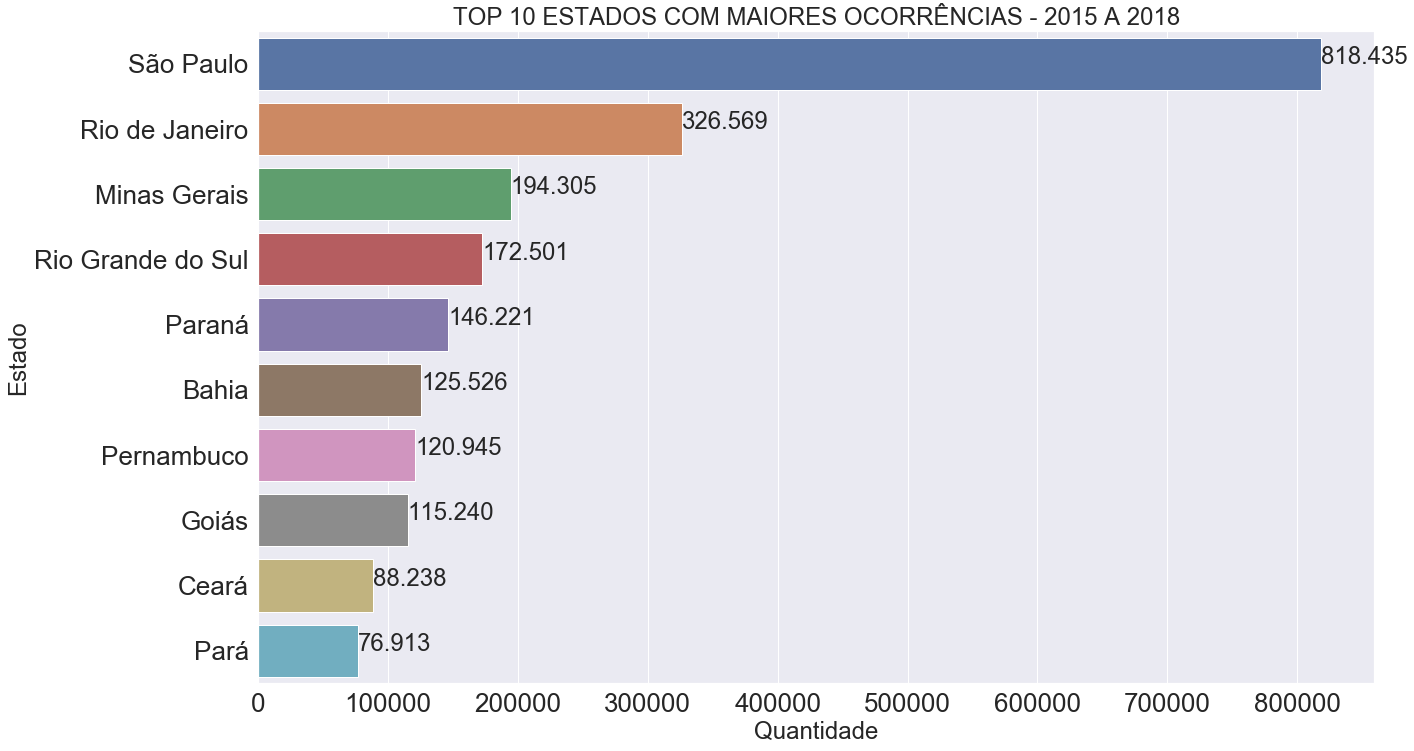

In [156]:
# Top 10 estados

fig, ax= plt.subplots(figsize=(20,12))
sns.set_style('whitegrid')
sns.set(font_scale=2) # fonte das quantidades nas barras (números)

ax=sns.barplot(ax=ax, x='valor_considerado', y='estado', data=ocorr_uf_top_10)

for p in ax.patches:
    quantidade ='{:.0f}'.format(p.get_width())
    num_format = format_qtd(quantidade)
        
    width, height=p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(num_format,(x,y))

plt.xticks(fontsize=26) # qtd no eixo x
plt.yticks(fontsize=26) # desc. no eixo y
plt.xlabel('Quantidade',fontsize=24)
plt.ylabel('Estado',fontsize=24)
plt.title('TOP 10 ESTADOS COM MAIORES OCORRÊNCIAS - 2015 A 2018', fontsize=24)
plt.show()

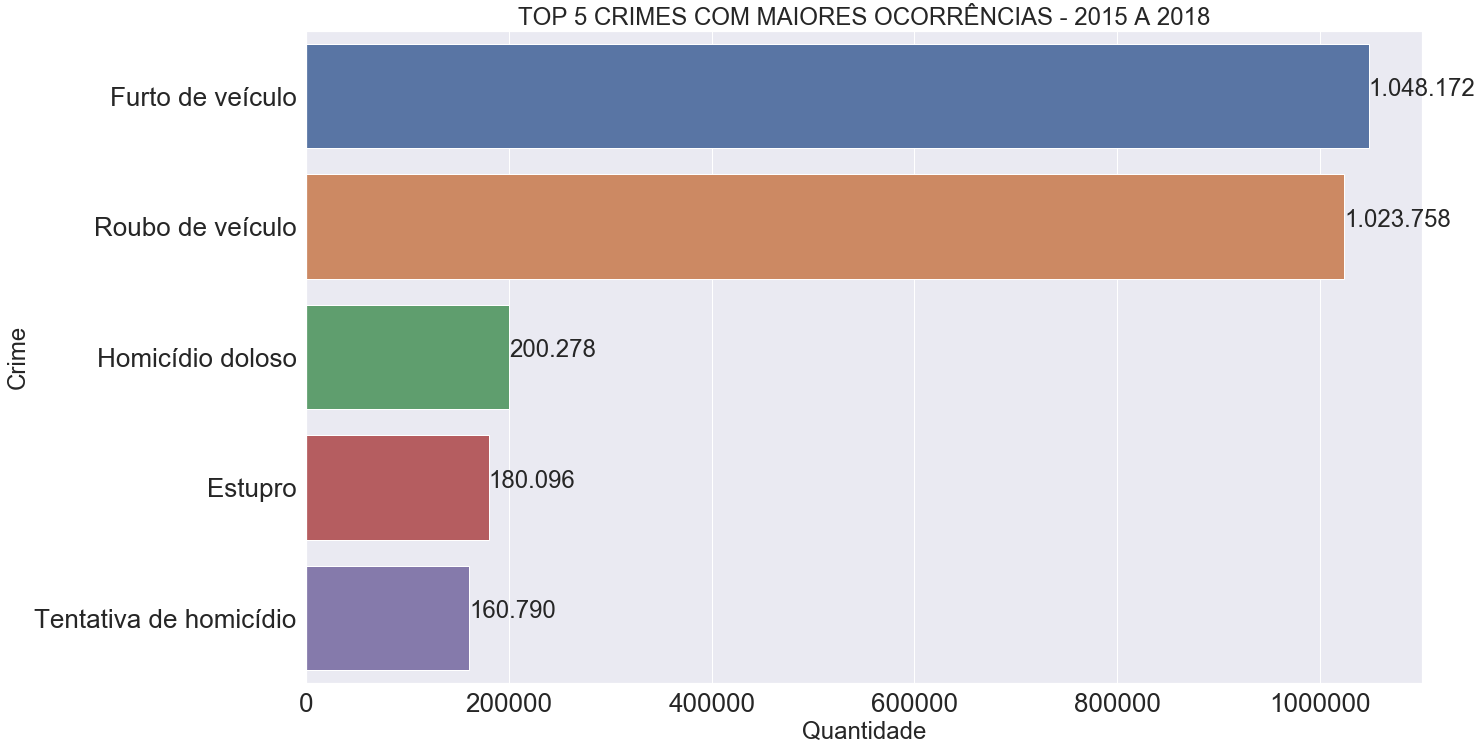

In [178]:
# Top 5 crimes

fig, ax= plt.subplots(figsize=(20,12))
sns.set_style('whitegrid')
sns.set(font_scale=2) # fonte das quantidades nas barras (números)

ax=sns.barplot(ax=ax, x='valor_considerado', y='tipo_crime', data=ocorr_cr_top_5)

for p in ax.patches:
    quantidade ='{:.0f}'.format(p.get_width())
    num_format = format_qtd(quantidade)
        
    width, height=p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(num_format,(x,y))

plt.xticks(fontsize=26) # qtd no eixo x
plt.yticks(fontsize=26) # desc. no eixo y
plt.xlabel('Quantidade',fontsize=24)
plt.ylabel('Crime',fontsize=24)
plt.title('TOP 5 CRIMES COM MAIORES OCORRÊNCIAS - 2015 A 2018', fontsize=24)
plt.show()

In [157]:
# Agrupando crimes por ano
valores_por_ano = df_ocorr.groupby('ano').sum().reset_index()
valores_por_ano.head()

,ano,id_tipo_crime,id_mes,valor_considerado
0,2015,14394,18725,661950
1,2016,14424,18768,714699
2,2017,14459,18812,708537
3,2018,14476,18843,631263


In [158]:
# Total de crimes por ano
data = [go.Bar( x=valores_por_ano.ano,
               y=valores_por_ano.valor_considerado,
               marker = {'color': 'lightblue'})]
# Layout:
configuracoes_layout = go.Layout(title='Total de Crimes no Período',
                                 yaxis={'title':'Crimes'},
                                 xaxis={'title': 'Período'})
# Figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# Plotando o gráfico:
py.iplot(fig)

In [159]:
# Agrupando crimes por região
crimes_por_regiao = df_ocorr.groupby('regiao').sum().reset_index()
crimes_por_regiao.head()

,regiao,id_tipo_crime,id_mes,ano,valor_considerado
0,Centro-Oeste,8640,11232,3484512,237593
1,Nordeste,19440,25272,7840152,520859
2,Norte,14553,18988,5886191,174495
3,Sudeste,8640,11232,3484512,1388340
4,Sul,6480,8424,2613384,395162


In [160]:
# Ocorrências por região no período

# Criando gráfico:
trace = go.Pie(labels = crimes_por_regiao.head().regiao,
               values = crimes_por_regiao.head().valor_considerado
              )

# Armazenando o gráfico em uma lista:
data = [trace]

# Layout:
layout = go.Layout(title='Ocorrências Por Região')

# Figura:
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

### Consultas para mostrar por sexo

In [161]:
# Sexo feminino
qf = """SELECT DISTINCT ano, sum(valor_considerado) as feminino FROM df_vit WHERE sexo_vitima='Feminino' GROUP BY ano;"""
pysqldf = lambda qf: sqldf(qf, globals())
query_f = pysqldf(qf)
df_feminino = pd.DataFrame(query_f)
df_feminino.head()

,ano,feminino
0,2015,7175
1,2016,7256
2,2017,8071
3,2018,7275


In [162]:
# Sexo Masculino
qm = """SELECT DISTINCT ano, sum(valor_considerado) as masculino FROM df_vit WHERE sexo_vitima='Masculino' GROUP BY ano;"""
pysqldf = lambda qm: sqldf(qm, globals())
query_m = pysqldf(qm)
df_masculino = pd.DataFrame(query_m)
df_masculino.head()

,ano,masculino
0,2015,52661
1,2016,55626
2,2017,59650
3,2018,51336


In [163]:
# Sexo não identificado
qni = """SELECT DISTINCT ano, sum(valor_considerado) as NI FROM df_vit WHERE sexo_vitima='Sexo NI' GROUP BY ano;"""
pysqldf = lambda qni: sqldf(qni, globals())
query_ni = pysqldf(qni)
df_sni = pd.DataFrame(query_ni)
df_sni.head()

,ano,NI
0,2015,3617
1,2016,3691
2,2017,3016
3,2018,2597


In [164]:
# Sexo sem informação
qsi = """SELECT DISTINCT ano, sum(valor_considerado) as SI FROM df_vit WHERE sexo_vitima='Sem Informação' GROUP BY ano;"""
pysqldf = lambda qsi: sqldf(qsi, globals())
query_si = pysqldf(qsi)
df_semi = pd.DataFrame(query_si)
df_semi.head()

,ano,SI
0,2017,7
1,2018,3


In [165]:
# Fazendo merge
df_sexo_vit1 = pd.merge(df_feminino[['ano','feminino']],df_masculino[['ano','masculino']],on='ano', how='outer')
df_sexo_vit2 = pd.merge(df_sni[['ano','NI']],df_semi[['ano','SI']],on='ano', how='outer')
df_sexo_vit1.head()

,ano,feminino,masculino
0,2015,7175,52661
1,2016,7256,55626
2,2017,8071,59650
3,2018,7275,51336


In [166]:
df_sexo_vit2.head()

,ano,NI,SI
0,2015,3617,NaN
1,2016,3691,NaN
2,2017,3016,7.0
3,2018,2597,3.0


In [167]:
df_sexo_vit3 = pd.merge(df_sexo_vit1[['ano','feminino','masculino']],df_sexo_vit2[['ano','NI','SI']],on='ano', how='outer')
df_sexo_vit3.head()

,ano,feminino,masculino,NI,SI
0,2015,7175,52661,3617,NaN
1,2016,7256,55626,3691,NaN
2,2017,8071,59650,3016,7.0
3,2018,7275,51336,2597,3.0


In [168]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_sexo_vit3.ano, y=df_sexo_vit3.feminino,
                    mode='lines',
                    name='feminino'))
fig.add_trace(go.Scatter(x=df_sexo_vit3.ano, y=df_sexo_vit3.masculino,
                    mode='lines',
                    name='masculino'))
fig.add_trace(go.Scatter(x=df_sexo_vit3.ano, y=df_sexo_vit3.NI,
                    mode='lines',
                    name='NI'))
fig.add_trace(go.Scatter(x=df_sexo_vit3.ano, y=df_sexo_vit3.SI,
                    mode='lines',
                    name='SI'))

fig.update_layout(title_text='Vítimas Por Sexo')

fig.show()

Text(0.5, 1.0, 'CRIMES POR ANO')

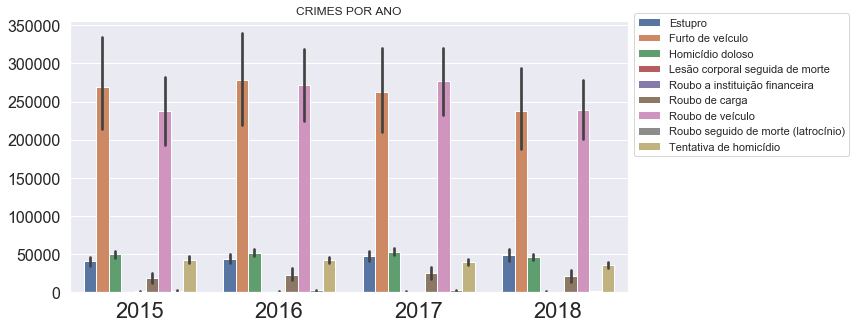

In [169]:
# Crimes por ano

fig, ax = plt.subplots(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.barplot(x='ano', y='valor_considerado', estimator=sum, data=df_ocorr, hue='tipo_crime') #, palette=colors)#, order = df3['nome_dia_semana'].value_counts().sort_values(ascending=False)) #.value_counts().index)
#plt.xticks(rotation=45)
#plt.xticks(range(len(ordena_dia_semana(df3.nome_dia_semana.unique()))), ordena_dia_semana(df3.nome_dia_semana.unique()), fontsize=16) # descrição no eixo x


plt.yticks(fontsize=16) # qtd no eixo y
plt.xlabel('',fontsize=14)
plt.ylabel('',fontsize=14)
plt.legend(loc=[1.01,0.5])
plt.title('CRIMES POR ANO', fontsize=12)

In [172]:
# Gravando csv para mostrar no Power BI
df_ocorr.to_csv('ocorrencias.csv')

In [173]:
# Gravando csv para mostrar no Power BI
df_vit.to_csv('vitimas.csv')